# Installs and Imports

In [1]:
# install dependencies:
# (use +cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-rz5rlsm6
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-rz5rlsm6
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275254 sha256=8eb573f82669a9646dc389d276b6a4bcce42df2d6cb13b5b946874dd93dd117f
  Stored in directory: /tmp/pip-ephem-wheel-cache-tck8wt1y/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software

In [2]:
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Found existing installation: detectron2 0.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Balloons Example

In [0]:
# import os
# import numpy as np
# import json
# from detectron2.structures import BoxMode

# # This function will return the items in our dataset
# def get_balloon_dicts(img_dir):
#     # Find the json file in our file structure
#     json_file = os.path.join(img_dir, "via_region_data.json")
#     # Open the file, referring it as f
#     with open(json_file) as f:
#         # Get the image annotations out using json to read the file containin the JSON object
#         imgs_anns = json.load(f)

#     # List of dictionaries
#     dataset_dicts = []
#     # Loop over the image annotation values, using idx as the indexer and v to be the value
#     for idx, v in enumerate(imgs_anns.values()):
#         # Create a dictionary for the current iteration
#         record = {}
        
#         # Get the filename out of the file - "filename" is a key in the json file
#         filename = os.path.join(img_dir, v["filename"])
#         # Get the height and width out using opencv
#         height, width = cv2.imread(filename).shape[:2]
        
#         # The full path to the image file
#         record["file_name"] = filename
#         # A unique id that identifies this image
#         record["image_id"] = idx
#         # Shape of the image
#         record["height"] = height
#         record["width"] = width
      
#         # get all annotations, using the regions key - "regions" is a key in the json file
#         annos = v["regions"]
#         # List of objects
#         objs = []
#         # For each annotation in the list of annotations
#         for _, anno in annos.items():
#             # assert throws an AssertionError if untrue
#             # I think this is just to make sure region attributes is empty
#             assert not anno["region_attributes"]
            
#             # Turn the annotation into the shape attributes object in the file
#             anno = anno["shape_attributes"]
#             # Get all x and y points
#             px = anno["all_points_x"]
#             py = anno["all_points_y"]
#             # form a list of polygons, some mad functional stuff here
#             poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
#             poly = [p for x in poly for p in x]

#             # Form the object that will form our annotations
#             obj = {
#                 # list of 4 numbers representing the bounding box
#                 "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
#                 # format of the bbox (must be a member of structures.BoxMode)
#                 "bbox_mode": BoxMode.XYXY_ABS,
#                 # list of list of floats, where a list of floats is a polygon
#                 # so this is a list of polygons for segmentation
#                 "segmentation": [poly],
#                 # the category label, integer from 0 to numCategories - see Categorical Data
#                 "category_id": 0,
#                 # 0 or 1, whether this instance is labeled as COCO's crowd regions - don't include this if you don't know what this means
#                 "iscrowd": 0
#             }
#             objs.append(obj)
        
#         # The per-instance annotation of every instance in this image
#         record["annotations"] = objs

#         # Append this record
#         dataset_dicts.append(record)
        
#         ### Loop end ###
    
#     # return the list of dictionaries
#     return dataset_dicts

# # We tell detectron2 about our newly created function
# from detectron2.data import DatasetCatalog, MetadataCatalog
# for d in ["train", "val"]:
#     # Register this dataset in the catalog of datasets
#     DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
#     # Get the metadata catalog and add the corresponding metadata
#     ## Metadata is a key-value mapping that contains primitive information that helps interpret what's in the dataset (eg names of classes)
#     ## Useful for augmentation, evaluation, visualisation, logging, etc.
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
# balloon_metadata = MetadataCatalog.get("balloon_train")

In [0]:
# dataset_dicts = get_balloon_dicts("balloon/train")
# for d in random.sample(dataset_dicts, 3):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
#     vis = visualizer.draw_dataset_dict(d)
#     cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
# from detectron2.engine import DefaultTrainer
# from detectron2.config import get_cfg

# # COCO-Detection/faster_rcnn_R_50_C4_1x.yaml
# # COCO-Detection/retinanet_R_50_FPN_1x.yaml

# # default configuration
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# # get the pretrained retinanet model
# # cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
# # list of the dataset names for training (registered in datasetcatalog (?))
# cfg.DATASETS.TRAIN = ("balloon_train",)
# # list of the dataset names for testing (registered in datasetcatalog (?))
# cfg.DATASETS.TEST = ()

# # number of data loading threads
# cfg.DATALOADER.NUM_WORKERS = 2

# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
# # locate the pretrained weights
# # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")  # Let training initialize from model zoo

# # number of images per batch
# cfg.SOLVER.IMS_PER_BATCH = 2
# # learning rate
# cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
# # max iterations
# cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset

# # Minibatch size PER image - number of regions of interest (ROIs)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
# # Number of classes
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)

# # directories (?)
# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# # Get the default trainer:
# ## 1) Create model, optimiser, scheduler, dataloader from the given config
# ## 2) Load a checkpoint or cfg.MODEL.WEIGHTS if it exists
# ## 3) Register a few common hooks (?)
# ## This simplifies the standard model training workflow, so you don't have to write boilerplate code
# trainer = DefaultTrainer(cfg)
# # If true, and the last checkpoint exists, resume from it
# # If false, load a model specified by the config
# trainer.resume_or_load(resume=False)
# trainer.train()

# Sharks Playing Around

In [0]:
# # Playing around with the json
# import cv2
# import os
# import numpy as np
# import json
# from detectron2.structures import BoxMode

# # This function will return the items in our dataset
# def get_shark_dicts(dataDirectory):
#   # Find the json file in our file structure
#   json_file = os.path.join(dataDirectory, "data.json")

#   # Open the file, referring to it as f
#   with open(json_file) as f:
#     # Get the image annotations out using json to read the file containin the JSON object
#     img_annotations = json.load(f)

#   # List of dictionaries
#   dataset_dicts = []
  
#   # Loop over the image annotation values, using idx as the indexer and v to be the value
#   for i, values in enumerate(img_annotations):
#     # Create empty record
#     record = {}

#     # Extract information from json file
#     imageID   = values["imId"]
#     filename  = values["imId"] +".jpg"
#     sharkID   = values["id"]
#     sharkSide = values["side"]
#     ymin, xmin, ymax, xmax = values["box_ymin_xmin_ymax_xmax"]

#     # Get image height and width
#     imHeight, imWidth = cv2.imread(dataDirectory+filename).shape[:2]

#     # Construct annotation object (bounding box)
#     obj = \
#     {
#         "bbox": [xmin,ymin,xmax,ymax],
#         "bbox_mode": BoxMode.XYXY_ABS,
#         # "segmentation": [poly],
#         "category_id": sharkID,
#         "iscrowd": 0
#     }

#     # Populate record
#     record["file_name"] = filename
#     record["image_id"]  = imageID
#     record["height"]    = imHeight
#     record["width"]     = imWidth
#     record["annotations"] = obj

#     # Append this record to the list of dictionaries
#     dataset_dicts.append(record)
    
#     # Only do it for 3 images (time saving)
#     print()
#     if idx == 2:
#       break

#   # Return the list of dictionaries
#   return dataset_dicts



######################################################################
######################################################################



# # json_file = os.path.join(img_dir, "data.json")
# # Open the file, referring it as f
# with open("data/data.json") as f:
#   # Get the image annotations out using json to read the file containin the JSON object
#   imgs_anns = json.load(f)

# # for idx, v in enumerate(imgs_anns.values()):
# for idx, v in enumerate(imgs_anns):
#   # Create empty record
#   record = {}

#   # Extract from database
#   imageID   = v["imId"]
#   filename  = v["imId"] +".jpg"
#   sharkID   = v["id"]
#   sharkSide = v["side"]
#   ymin, xmin, ymax, xmax = v["box_ymin_xmin_ymax_xmax"]

#   # Get image height and width
#   imHeight, imWidth = cv2.imread("data/"+filename).shape[:2]

#   # Construct annotation object
#   obj = \
#   {
#       "bbox": [xmin,ymin,xmax,ymax],
#       "bbox_mode": BoxMode.XYXY_ABS,
#       # "segmentation": [poly],
#       "category_id": sharkID,
#       "iscrowd": 0
#   }

#   # Populate record
#   record["file_name"] = filename
#   record["image_id"]  = imageID
#   record["height"]    = imHeight
#   record["width"]     = imWidth
#   record["annotations"] = obj

#   # print(idx)
#   # filename = v["imId"] +".jpg"
#   # print("imId: ", v["imId"])
#   # print("filename: ", filename)
#   # sharkID = v["id"]
#   # print("id: ", v["id"])
#   # print("side: ", v["side"])
#   # print("box_ymin_xmin_ymax_xmax: ", v["box_ymin_xmin_ymax_xmax"])

#   # ymin, xmin, ymax, xmax = v["box_ymin_xmin_ymax_xmax"]

#   # height, width = cv2.imread(filename).shape[:2]
#   # print("h,w: ",height,width)
  

#   # Getting record["annotations"] = objs:

#   # obj = \
#   # {
#   #     "bbox": [xmin,ymin,xmax,ymax],
#   #     "bbox_mode": BoxMode.XYXY_ABS,
#   #     # "segmentation": [poly],
#   #     "category_id": sharkID,
#   #     "iscrowd": 0
#   # }

  
#   # dataset_dicts.append(record)
  
#   print()
#   if idx == 2:
#     break




# To build a record, we need the following:
# record["file_name"] = filename # OKAY
# record["image_id"] = idx # OKAY
# record["height"] = height # OKAY
# record["width"] = width # OKAY
# record["annotations"] = objs # bit more complicated







In [0]:
# import os
# import numpy as np
# import json
# from detectron2.structures import BoxMode

# # This function will return the items in our dataset
# def get_shark_dicts(img_dir):
#     # Find the json file in our file structure
#     json_file = os.path.join(img_dir, "data.json")
#     # Open the file, referring it as f
#     with open(json_file) as f:
#         # Get the image annotations out using json to read the file containin the JSON object
#         imgs_anns = json.load(f)

#     # List of dictionaries
#     dataset_dicts = []
#     # Loop over the image annotation values, using idx as the indexer and v to be the value
#     for idx, v in enumerate(imgs_anns.values()):
#         # Create a dictionary for the current iteration
#         record = {}
        
#         # Get the filename out of the file - "filename" is a key in the json file
#         filename = os.path.join(img_dir, v["imId"])
#         # Get the height and width out using opencv
#         height, width = cv2.imread(filename).shape[:2]
        
#         # The full path to the image file
#         record["file_name"] = filename
#         # A unique id that identifies this image
#         record["image_id"] = idx
#         # Shape of the image
#         record["height"] = height
#         record["width"] = width
      
#         # get all annotations, using the regions key - "regions" is a key in the json file
#         annos = v["regions"]
#         # List of objects
#         objs = []
#         # For each annotation in the list of annotations
#         for _, anno in annos.items():
#             # assert throws an AssertionError if untrue
#             # I think this is just to make sure region attributes is empty
#             assert not anno["region_attributes"]
            
#             # Turn the annotation into the shape attributes object in the file
#             anno = anno["shape_attributes"]
#             # Get all x and y points
#             px = anno["all_points_x"]
#             py = anno["all_points_y"]
#             # form a list of polygons, some mad functional stuff here
#             poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
#             poly = [p for x in poly for p in x]

#             # Form the object that will form our annotations
#             obj = {
#                 # list of 4 numbers representing the bounding box
#                 "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
#                 # format of the bbox (must be a member of structures.BoxMode)
#                 "bbox_mode": BoxMode.XYXY_ABS,
#                 # list of list of floats, where a list of floats is a polygon
#                 # so this is a list of polygons for segmentation
#                 "segmentation": [poly],
#                 # the category label, integer from 0 to numCategories - see Categorical Data
#                 "category_id": 0,
#                 # 0 or 1, whether this instance is labeled as COCO's crowd regions - don't include this if you don't know what this means
#                 "iscrowd": 0
#             }
#             objs.append(obj)
        
#         # The per-instance annotation of every instance in this image
#         record["annotations"] = objs

#         # Append this record
#         dataset_dicts.append(record)
        
#         ### Loop end ###
    
#     # return the list of dictionaries
#     return dataset_dicts

# # We tell detectron2 about our newly created function
# from detectron2.data import DatasetCatalog, MetadataCatalog
# for d in ["train", "val"]:
#     # Register this dataset in the catalog of datasets
#     DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
#     # Get the metadata catalog and add the corresponding metadata
#     ## Metadata is a key-value mapping that contains primitive information that helps interpret what's in the dataset (eg names of classes)
#     ## Useful for augmentation, evaluation, visualisation, logging, etc.
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
# balloon_metadata = MetadataCatalog.get("balloon_train")

# Sharks Final

Construct Dictionary of SharkIDs to Classes

In [0]:
import cv2
import os
import numpy as np
import json
from detectron2.structures import BoxMode

def createSharkClassID(filename):
  json_file = filename

  SharkClassDictionary = {}

  # Open the file
  with open(json_file) as f:
    img_annotations = json.load(f)

  classID = 0
  for i, values in enumerate(img_annotations):
    # Get the sharkID out
    sharkID   = values["id"]

    # If the current sharkID has not been assigned a classID
    if(sharkID not in SharkClassDictionary):
      # Add the sharkID to the dictionary, giving it a classID
      SharkClassDictionary[sharkID] = classID
      # Increment the classID for the next sharkID
      classID = classID + 1

  return SharkClassDictionary


SharkClassDictionary = createSharkClassID("data/full_data.json")
# print(SharkClassDictionary)
# print(list(SharkClassDictionary.keys()))

Registering the shark data with detectron2

In [0]:
# Playing around with the json
import cv2
import os
import numpy as np
import json
from detectron2.structures import BoxMode

# This function will return the items in our dataset
def getSharkDicts(dataDirectory):
  # Find the json file in our file structure
  json_file = os.path.join(dataDirectory, "data.json")

  # Open the file, referring to it as f
  with open(json_file) as f:
    # Get the image annotations out using json to read the file containin the JSON object
    img_annotations = json.load(f)

  # List of dictionaries
  dataset_dicts = []
  
  # Loop over the image annotation values, using idx as the indexer and v to be the value
  for i, values in enumerate(img_annotations):
    # Create empty record
    record = {}

    # Extract information from json file
    imageID   = values["imId"]
    filename  = dataDirectory + values["imId"] +".jpg"
    sharkID   = values["id"]
    sharkSide = values["side"]
    ymin, xmin, ymax, xmax = values["box_ymin_xmin_ymax_xmax"]

    # Get image height and width
    imHeight, imWidth = cv2.imread(filename).shape[:2]

    # Construct annotation object (bounding box)
    objs = []
    
    #Get ClassID from SharkID
    classID = SharkClassDictionary[sharkID]

    # Construct an annotation object (only one in this case)
    obj = \
    {
        "bbox": [xmin,ymin,xmax,ymax],
        "bbox_mode": BoxMode.XYXY_ABS,
        "category_id": classID, #this needs to be a unique INTEGER ID for the shark - sort through data set before this
        "iscrowd": 0
    }
    objs.append(obj)

    # Populate record
    record["file_name"] = filename
    record["image_id"]  = imageID
    record["height"]    = imHeight
    record["width"]     = imWidth
    record["annotations"] = objs

    # Append this record to the list of dictionaries
    dataset_dicts.append(record)
    
    # Only do it for 3 images (time saving)
    # print()
    # if idx == 2:
      # break

  # Return the list of dictionaries
  return dataset_dicts

# Enter into dataset and metadata catalogues
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "val"]:
    DatasetCatalog.register("sharkfin_" + d, lambda d=d: getSharkDicts("data/" + d))
    MetadataCatalog.get("sharkfin_" + d).set(thing_classes=list(SharkClassDictionary.keys()))
shark_metadata = MetadataCatalog.get("sharkfin_train")

Visualise to check this worked



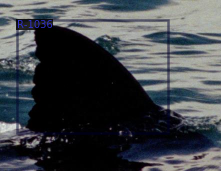

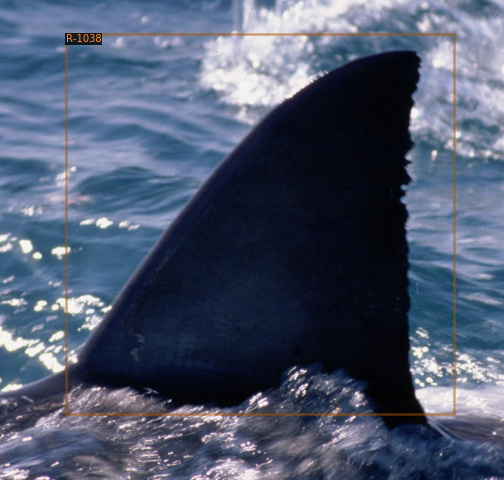

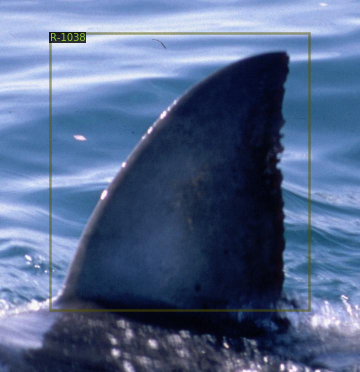

In [4]:
dataset_dicts = getSharkDicts("data/")
# for d in random.sample(dataset_dicts, 2):
for dictionary in dataset_dicts:
  # print(dictionary)
  # annos = dictionary.get("annotations", None)
  # if annos:
    # print(annos[0])
  # print(d["file_name"])
  img = cv2.imread(dictionary["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=shark_metadata, scale=0.5)
  vis = visualizer.draw_dataset_dict(dictionary)
  cv2_imshow(vis.get_image()[:, :, ::-1])